#1 广告数据的岭回归-GridSearchCV超参数优化

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
5      8.7   48.9       75.0
6     57.5   32.8       23.5
7    120.2   19.6       11.6
8      8.6    2.1        1.0
9    199.8    2.6       21.2
10    66.1    5.8       24.2
11   214.7   24.0        4.0
12    23.8   35.1       65.9
13    97.5    7.6        7.2
14   204.1   32.9       46.0
15   195.4   47.7       52.9
16    67.8   36.6      114.0
17   281.4   39.6       55.8
18    69.2   20.5       18.3
19   147.3   23.9       19.1
20   218.4   27.7       53.4
21   237.4    5.1       23.5
22    13.2   15.9       49.6
23   228.3   16.9       26.2
24    62.3   12.6       18.3
25   262.9    3.5       19.5
26   142.9   29.3       12.6
27   240.1   16.7       22.9
28   248.8   27.1       22.9
29    70.6   16.0       40.8
..     ...    ...        ...
170   50.0   11.6       18.4
171  164.5   20.9       47.4
172   19.6   2

超参数：
 {'alpha': 100.0}
0.915232753209
1.98213253677 1.40788228797


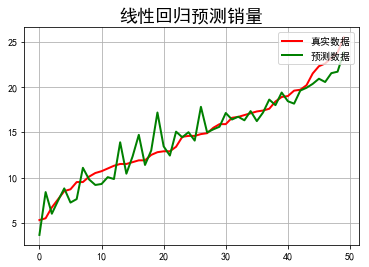

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

# pandas读入
data = pd.read_csv('data/Advertising.csv')    # TV、Radio、Newspaper、Sales
x = data[['TV','Radio','Newspaper']]
y = data['Sales']
print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
# model = Lasso()
model = Ridge()
alpha_can = np.logspace(-3, 2, 10)
np.set_printoptions(suppress=True)
print('alpha_can = ', alpha_can)
lasso_model = GridSearchCV(model, param_grid={'alpha': alpha_can}, cv=10)
lasso_model.fit(x_train, y_train)
print('超参数：\n', lasso_model.best_params_)

order = y_test.argsort(axis=0)
y_test = y_test.values[order]
x_test = x_test.values[order, :]
y_hat = lasso_model.predict(x_test)
print(lasso_model.score(x_test, y_test))
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print(mse, rmse)

t = np.arange(len(x_test))
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(t, y_test, 'r-', linewidth=2, label=u'真实数据')
plt.plot(t, y_hat, 'g-', linewidth=2, label=u'预测数据')
plt.title(u'线性回归预测销量', fontsize=18)
plt.legend(loc='upper right')
plt.grid()
plt.show()

#2 随机数的曲线拟合-岭回归解法

Ridge回归：1阶，alpha=0.109854，系数为： [-16.73828116   4.84417296]
Ridge回归：2阶，alpha=0.086851，系数为： [-2.90276905 -3.63821499  0.95508363]
Ridge回归：3阶，alpha=0.086851，系数为： [-3.22407107 -3.30039862  0.8648593   0.00684773]
Ridge回归：4阶，alpha=0.355648，系数为： [-2.74140509 -2.16265281 -0.09281597  0.21275748 -0.0132477 ]
Ridge回归：5阶，alpha=0.001000，系数为： [-1.88859925 -8.17104444  5.06924641 -1.38195003  0.19350179 -0.00957532]
Ridge回归：6阶，alpha=0.021210，系数为： [-3.15191151 -2.79135834 -0.74980922  1.23485664 -0.37140789  0.04856869 -0.00229183]
Ridge回归：7阶，alpha=0.054287，系数为： [-2.91639356 -2.58985871 -0.89774668  1.06517134 -0.23526261  0.01339113  0.00161323 -0.00015961]


Ridge回归：8阶，alpha=0.568987，系数为： [-1.57462286 -1.72673832 -1.35194921 -0.2281452   0.80933892 -0.30936971  0.05107704 -0.00392295  0.00011376]


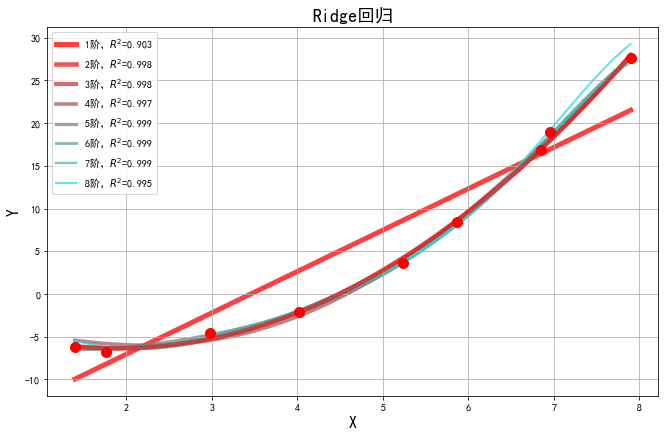

In [18]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.exceptions import ConvergenceWarning
import matplotlib as mpl
import warnings

def xss(y, y_hat):
    y = y.ravel()
    y_hat = y_hat.ravel()
    # Version 1
    tss = ((y - np.average(y)) ** 2).sum()
    rss = ((y_hat - y) ** 2).sum()
    ess = ((y_hat - np.average(y)) ** 2).sum()
    r2 = 1 - rss / tss
    # print 'RSS:', rss, '\t ESS:', ess
    # print 'TSS:', tss, 'RSS + ESS = ', rss + ess
    tss_list.append(tss)
    rss_list.append(rss)
    ess_list.append(ess)
    ess_rss_list.append(rss + ess)
    # Version 2
    # tss = np.var(y)
    # rss = np.average((y_hat - y) ** 2)
    # r2 = 1 - rss / tss
    corr_coef = np.corrcoef(y, y_hat)[0, 1]
    return r2, corr_coef

warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
np.random.seed(0)
np.set_printoptions(linewidth=1000)
N = 9
x = np.linspace(0, 8, N) + np.random.randn(N)
x = np.sort(x)
y = x**2 - 4*x - 3 + np.random.randn(N)

x.shape = -1, 1
y.shape = -1, 1

model = Pipeline([('poly', PolynomialFeatures()),('linear', RidgeCV(alphas=np.logspace(-3, 2, 50), fit_intercept=False))])
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
np.set_printoptions(suppress=True)

plt.figure(figsize=(18, 12), facecolor='w')
d_pool = np.arange(1, N, 1)  # 阶
m = d_pool.size
clrs = []  # 颜色
for c in np.linspace(16711680, 255, N):
    clrs.append("#{:06X}".format(int(c), 2))
line_width = np.linspace(5, 2, m)
titles =  u'Ridge回归'
tss_list = []
rss_list = []
ess_list = []
ess_rss_list = []
plt.subplot(2, 2, 1)
plt.plot(x, y, 'ro', ms=10, zorder=N)
for i, d in enumerate(d_pool):
    model.set_params(poly__degree=d)
    model.fit(x, y.ravel())
    lin = model.get_params('linear')['linear']
    output = u'%s：%d阶，系数为：' % (titles, d)
    if hasattr(lin, 'alpha_'):
        idx = output.find(u'系数')
        output = output[:idx] + (u'alpha=%.6f，' % lin.alpha_) + output[idx:]
    if hasattr(lin, 'l1_ratio_'):   # 根据交叉验证结果，从输入l1_ratio(list)中选择的最优l1_ratio_(float)
        idx = output.find(u'系数')
        output = output[:idx] + (u'l1_ratio=%.6f，' % lin.l1_ratio_) + output[idx:]
    print(output, lin.coef_.ravel())
    x_hat = np.linspace(x.min(), x.max(), num=100)
    x_hat.shape = -1, 1
    y_hat = model.predict(x_hat)
    s = model.score(x, y)
    r2, corr_coef = xss(y, model.predict(x))
    # print 'R2和相关系数：', r2, corr_coef
    # print 'R2：', s, '\n'
    z = N - 1 if (d == 2) else 0
    label = u'%d阶，$R^2$=%.3f' % (d, s)
    if hasattr(lin, 'l1_ratio_'):
        label += u'，L1 ratio=%.2f' % lin.l1_ratio_
    plt.plot(x_hat, y_hat, color=clrs[i], lw=line_width[i], alpha=0.75, label=label, zorder=z)
plt.legend(loc='upper left')
plt.grid(True)
plt.title(titles, fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
    
plt.tight_layout(1, rect=(0, 0, 1, 0.95))
plt.show()